In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/MyDrive/bangladesh_student/Stress2.csv')
data.head()

,1. Age,3. University,4. Department,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often have you felt upset due to something that happened in your academic affairs?","2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?","3. In a semester, how often you felt nervous and stressed because of academic pressure?","4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams)","5. In a semester, how often you felt confident about your ability to handle your academic / university problems?",...,"10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them?",Stress Level\n0-13: low stress\n14-26: moderate stress\n27-40: high preceived stress,2. Gender_Female,2. Gender_Male,2. Gender_Prefer not to say,5. Academic Year_First Year or Equivalent,5. Academic Year_Fourth Year or Equivalent,5. Academic Year_Other,5. Academic Year_Second Year or Equivalent,5. Academic Year_Third Year or Equivalent
0,1,8,2,1,0,2,2,3,2,2,...,2,1,True,False,False,False,True,False,False,False
1,1,8,2,4,0,2,2,2,2,2,...,2,1,False,True,False,True,False,False,False,False
2,1,8,2,2,0,3,2,2,3,3,...,1,1,False,True,False,True,False,False,False,False
3,1,8,2,3,0,2,2,2,2,2,...,2,1,False,True,False,True,False,False,False,False
4,1,8,2,3,0,2,2,2,2,2,...,2,1,False,True,False,True,False,False,False,False


In [3]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("/content/drive/MyDrive/bangladesh_student/Stress2.csv")

# Drop the 'Abundance' column from the DataFrame to create the feature matrix X
X = data.drop('Stress Level\n0-13: low stress\n14-26: moderate stress\n27-40: high preceived stress', axis=1)

# Extract the 'Abundance' column as the target variable y
y = data['Stress Level\n0-13: low stress\n14-26: moderate stress\n27-40: high preceived stress']

# Print the feature matrix X and target variable y
print(X)
print(y)


      1. Age  3. University  4. Department  6. Current CGPA  \
0          1              8              2                1   
1          1              8              2                4   
2          1              8              2                2   
3          1              8              2                3   
4          1              8              2                3   
...      ...            ...            ...              ...   
1972       2              2              0                3   
1973       2              2             10                3   
1974       2              2              0                4   
1975       2              2             10                2   
1976       2              8              2                1   

      7. Did you receive a waiver or scholarship at your university?  \
0                                                     0                
1                                                     0                
2                          

In [4]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

# Scale the feature matrix for Chi-squared test (it requires non-negative values)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 1. Chi-squared Test
chi2_selector = SelectKBest(score_func=chi2, k='all')  # 'all' means we calculate scores for all features
X_chi2_selected = chi2_selector.fit_transform(X_scaled, y)

# Get scores and feature names
chi2_scores = chi2_selector.scores_
chi2_features = X.columns

# Print Chi-squared scores for each feature
print("Chi-squared Test Scores:")
for feature, score in zip(chi2_features, chi2_scores):
    print(f"{feature}: {score:.2f}")

# 2. ANOVA F-test
f_test_selector = SelectKBest(score_func=f_classif, k='all')
X_f_test_selected = f_test_selector.fit_transform(X, y)

# Get scores and feature names
f_test_scores = f_test_selector.scores_

print("\nANOVA F-test Scores:")
for feature, score in zip(X.columns, f_test_scores):
    print(f"{feature}: {score:.2f}")

# 3. Mutual Information
mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k='all')
X_mutual_info_selected = mutual_info_selector.fit_transform(X, y)

# Get scores and feature names
mutual_info_scores = mutual_info_selector.scores_

print("\nMutual Information Scores:")
for feature, score in zip(X.columns, mutual_info_scores):
    print(f"{feature}: {score:.2f}")

# After selecting features, you can reduce the dataset
# Example: Keep top 5 features from Chi-squared test
top_features_idx = chi2_selector.get_support(indices=True)[:5]
X_filtered = X.iloc[:, top_features_idx]

print("\nTop features selected based on Chi-squared test:")
print(X_filtered.head())


Chi-squared Test Scores:
1. Age: 0.32
3. University: 17.86
4. Department: 1.73
6. Current CGPA: 2.39
7. Did you receive a waiver or scholarship at your university?: 0.32
1. In a semester, how often have you felt upset due to something that happened in your academic affairs?: 109.32
2. In a semester, how often you felt as if you were unable to control important things in your academic affairs? : 119.30
3. In a semester, how often you felt nervous and stressed because of academic pressure? : 92.41
4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) : 127.90
5. In a semester, how often you felt confident about your ability to handle your academic / university problems?: 25.73
6. In a semester, how often you felt as if things in your academic life is going on your way? : 49.55
7. In a semester, how often are you able to control irritations in your academic / university affairs?: 24.12
8. In a semester, ho

<ipython-input-6-e7f6ad3cd8f4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Chi2', y='Feature', data=feature_scores.sort_values(by='Chi2', ascending=False), palette='Blues_r')
<ipython-input-6-e7f6ad3cd8f4>:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


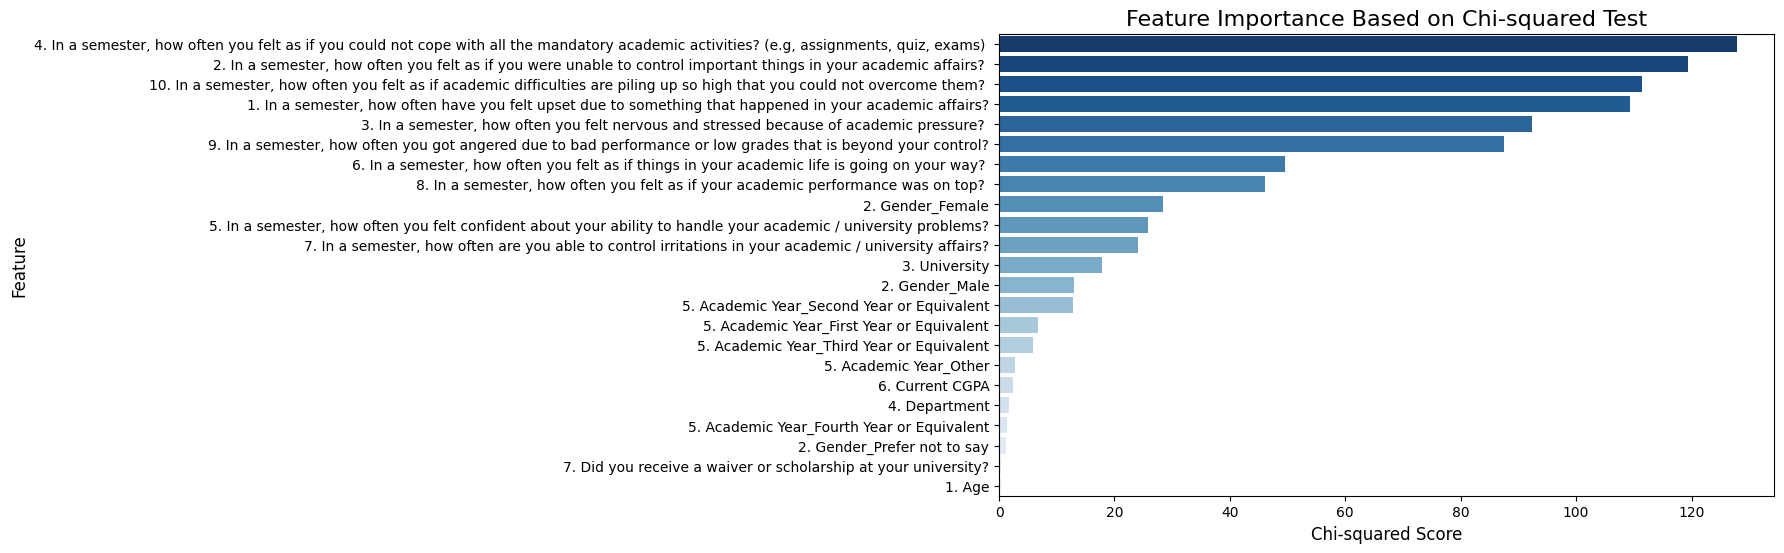

<ipython-input-6-e7f6ad3cd8f4>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F-test', y='Feature', data=feature_scores.sort_values(by='F-test', ascending=False), palette='Greens_r')
<ipython-input-6-e7f6ad3cd8f4>:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


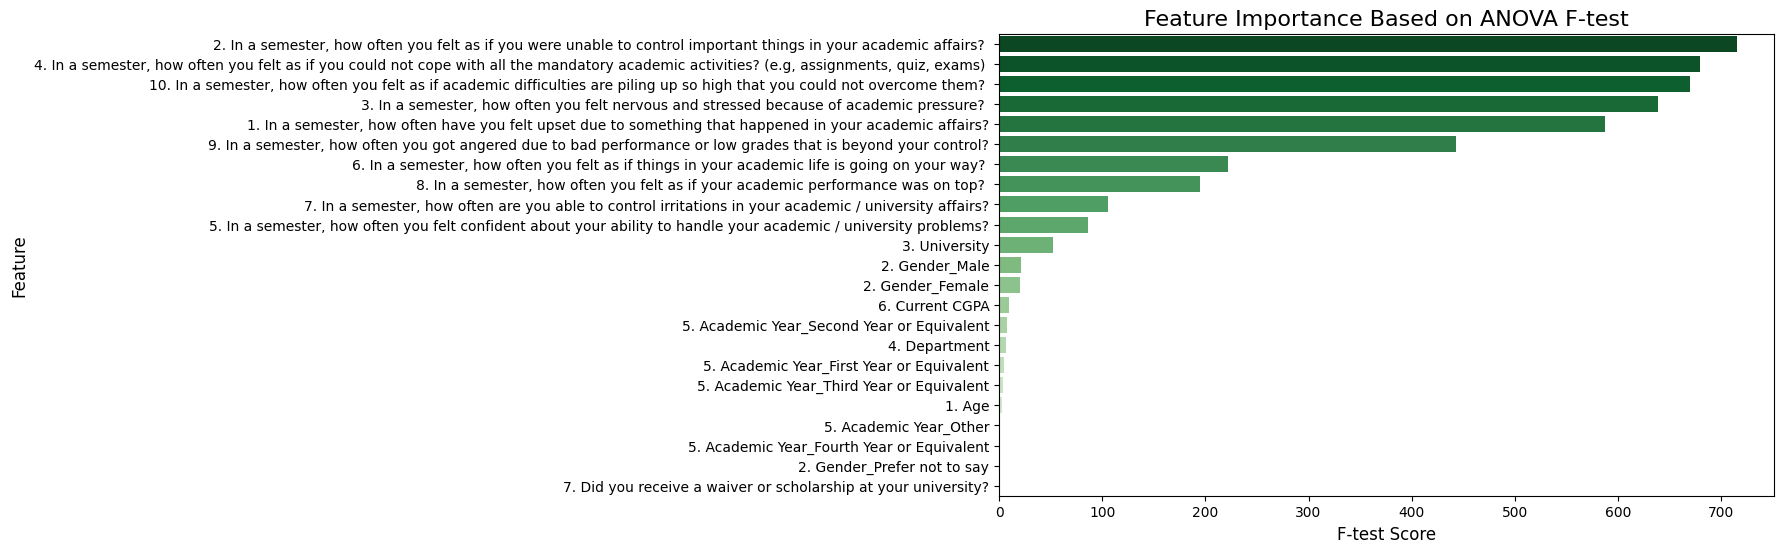

<ipython-input-6-e7f6ad3cd8f4>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=feature_scores.sort_values(by='Mutual Information', ascending=False), palette='Oranges_r')
<ipython-input-6-e7f6ad3cd8f4>:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


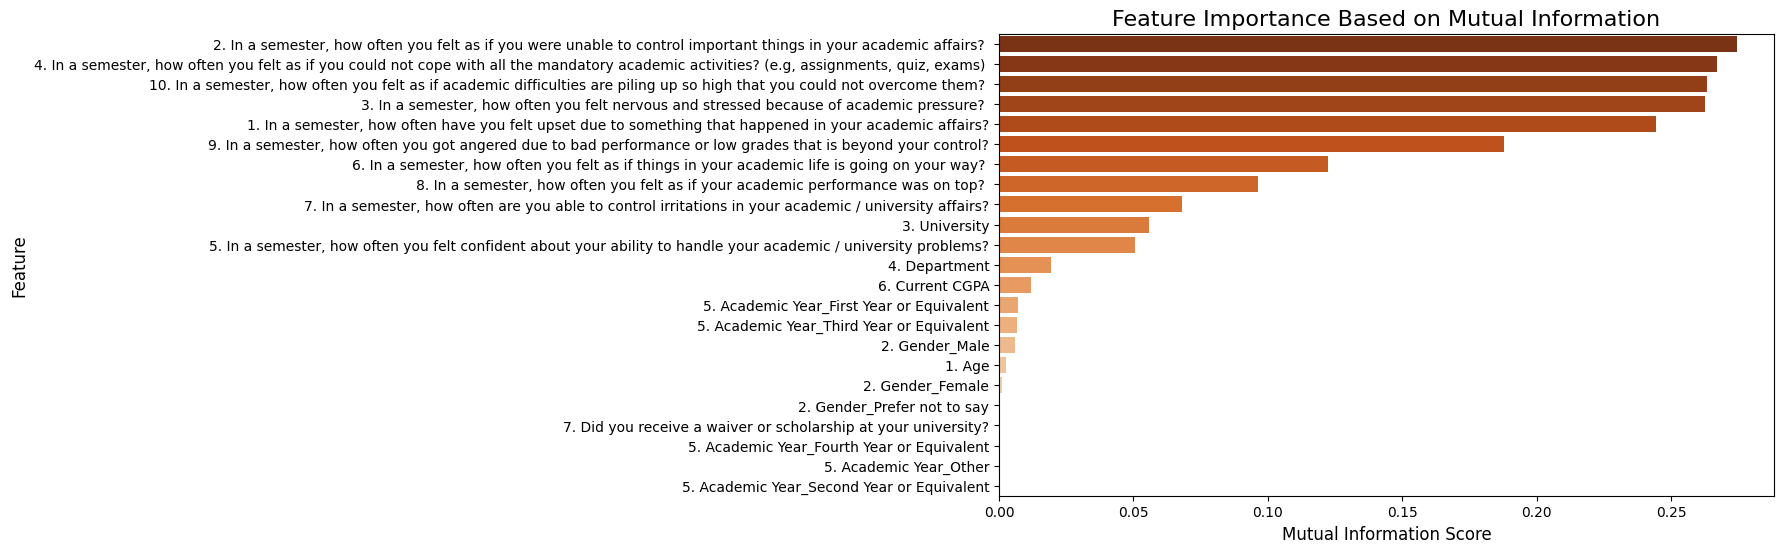

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert scores to DataFrame for easy visualization
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2': chi2_scores,
    'F-test': f_test_scores,
    'Mutual Information': mutual_info_scores
})

# Plot Chi-squared scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Chi2', y='Feature', data=feature_scores.sort_values(by='Chi2', ascending=False), palette='Blues_r')
plt.title('Feature Importance Based on Chi-squared Test', fontsize=16)
plt.xlabel('Chi-squared Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Plot F-test scores
plt.figure(figsize=(10, 6))
sns.barplot(x='F-test', y='Feature', data=feature_scores.sort_values(by='F-test', ascending=False), palette='Greens_r')
plt.title('Feature Importance Based on ANOVA F-test', fontsize=16)
plt.xlabel('F-test Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Plot Mutual Information scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=feature_scores.sort_values(by='Mutual Information', ascending=False), palette='Oranges_r')
plt.title('Feature Importance Based on Mutual Information', fontsize=16)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


Selected Features by RFE:
Index(['2. In a semester, how often you felt as if you were unable to control important things in your academic affairs? ',
       '3. In a semester, how often you felt nervous and stressed because of academic pressure? ',
       '4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) ',
       '6. In a semester, how often you felt as if things in your academic life is going on your way? ',
       '10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them? '],
      dtype='object')

Validation Accuracy with Selected Features: 0.85
Test Accuracy with Selected Features: 0.89


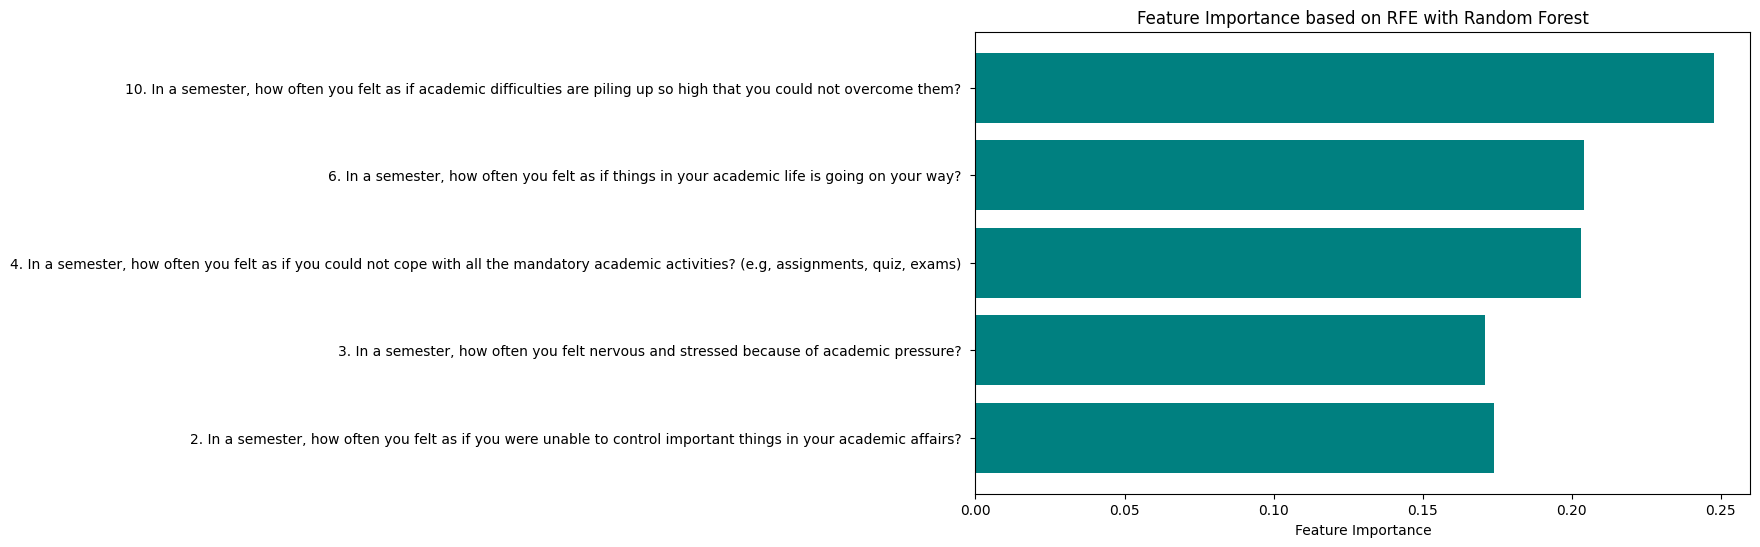

In [7]:
# Import necessary libraries
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd


# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rf_classifier, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_train, y_train)

# Get the ranking of features
ranking = rfe.ranking_
selected_features = X.columns[rfe.support_]  # Features selected by RFE

print("Selected Features by RFE:")
print(selected_features)

# Evaluate the model with selected features
X_train_selected = rfe.transform(X_train)
X_val_selected = rfe.transform(X_val)
X_test_selected = rfe.transform(X_test)

rf_classifier.fit(X_train_selected, y_train)
y_val_pred = rf_classifier.predict(X_val_selected)
y_test_pred = rf_classifier.predict(X_test_selected)

# Calculate accuracy for validation and test sets
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nValidation Accuracy with Selected Features: {val_accuracy:.2f}")
print(f"Test Accuracy with Selected Features: {test_accuracy:.2f}")

# Plot feature importance (optional)
feature_importance = rfe.estimator_.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importance, color='teal')
plt.xlabel('Feature Importance')
plt.title('Feature Importance based on RFE with Random Forest')
plt.show()


<ipython-input-8-551e0238448f>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-8-551e0238448f>:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


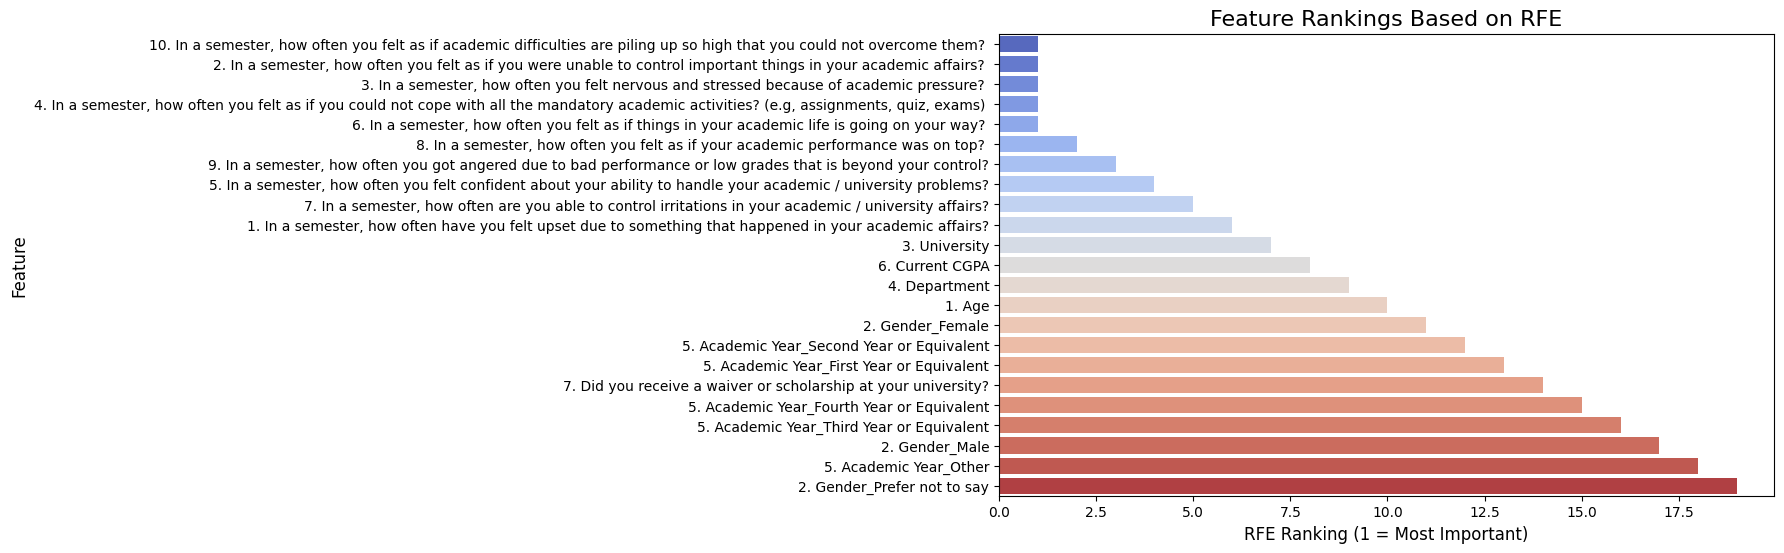

<ipython-input-8-551e0238448f>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-8-551e0238448f>:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


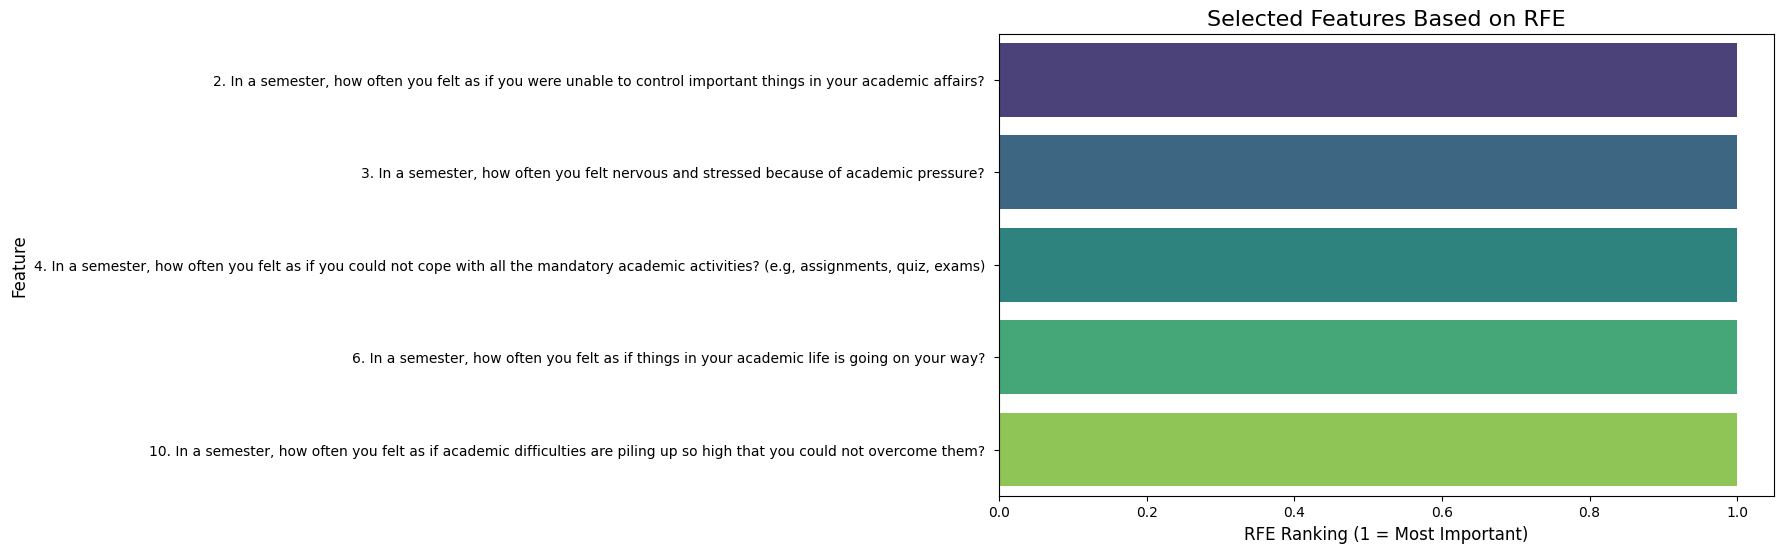

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are already defined, and the dataset is pre-split into train/test/validation sets

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rf_classifier, n_features_to_select=5)  # Adjust number of features to select
rfe.fit(X_train, y_train)

# Feature rankings
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
})

# Mark selected features
feature_scores['Selected'] = ['Yes' if rank == 1 else 'No' for rank in feature_scores['Ranking']]

# Filter only selected features
selected_features = feature_scores[feature_scores['Selected'] == 'Yes']

# Plot feature rankings (all features)
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Ranking',
    y='Feature',
    data=feature_scores.sort_values(by='Ranking'),
    palette='coolwarm'
)
plt.title('Feature Rankings Based on RFE', fontsize=16)
plt.xlabel('RFE Ranking (1 = Most Important)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Plot only the selected features
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Ranking',
    y='Feature',
    data=selected_features.sort_values(by='Ranking'),
    palette='viridis'
)
plt.title('Selected Features Based on RFE', fontsize=16)
plt.xlabel('RFE Ranking (1 = Most Important)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-9-4b9ef61771ab>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=mi_scores_df, palette='Oranges_r')
<ipython-input-9-4b9ef61771ab>:47: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


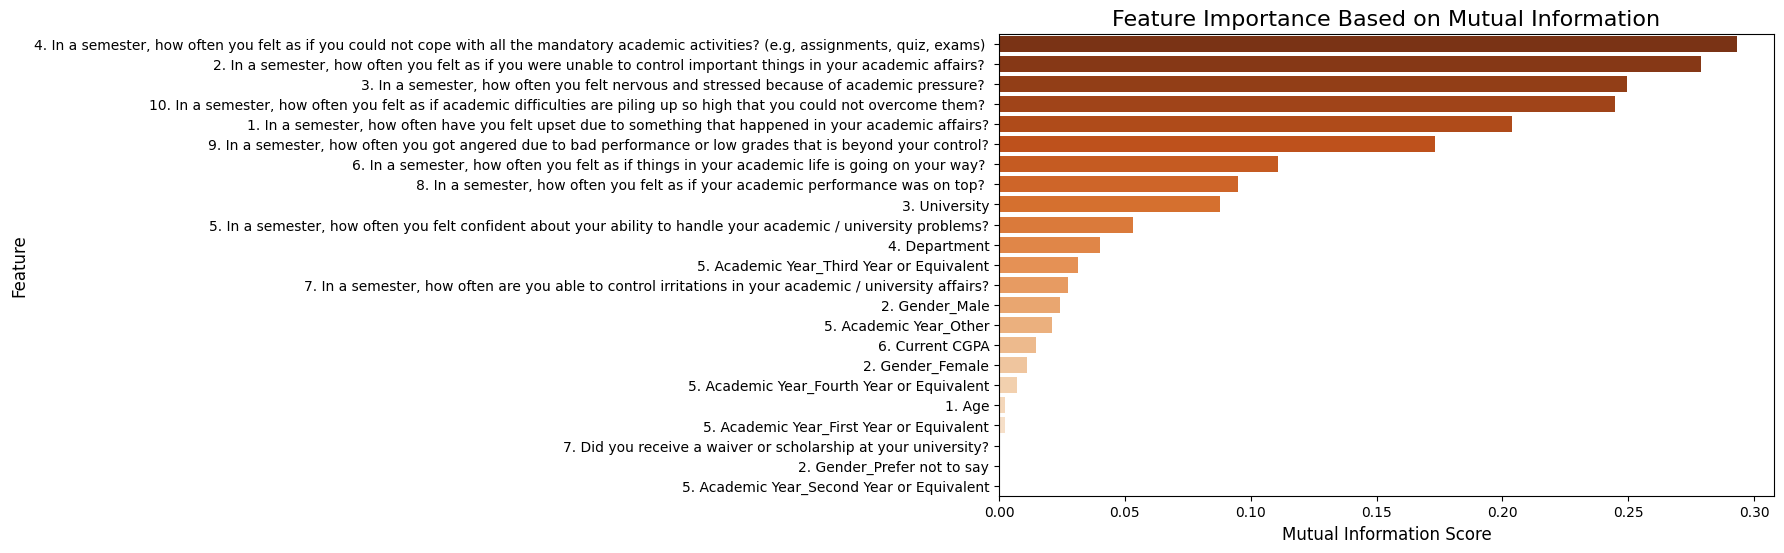

<ipython-input-9-4b9ef61771ab>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Normalized RFE Score', y='Feature', data=rfe_scores_df, palette='Blues_r')
<ipython-input-9-4b9ef61771ab>:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


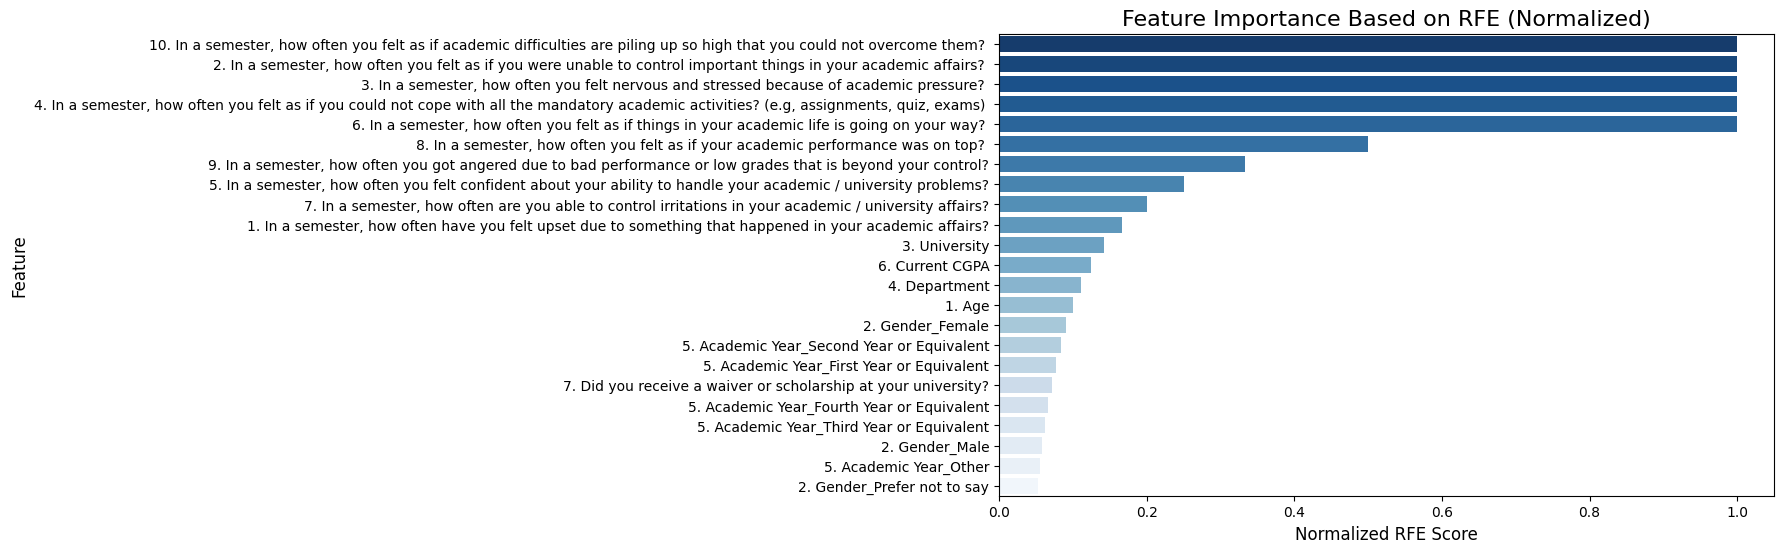

<ipython-input-9-4b9ef61771ab>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-9-4b9ef61771ab>:70: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


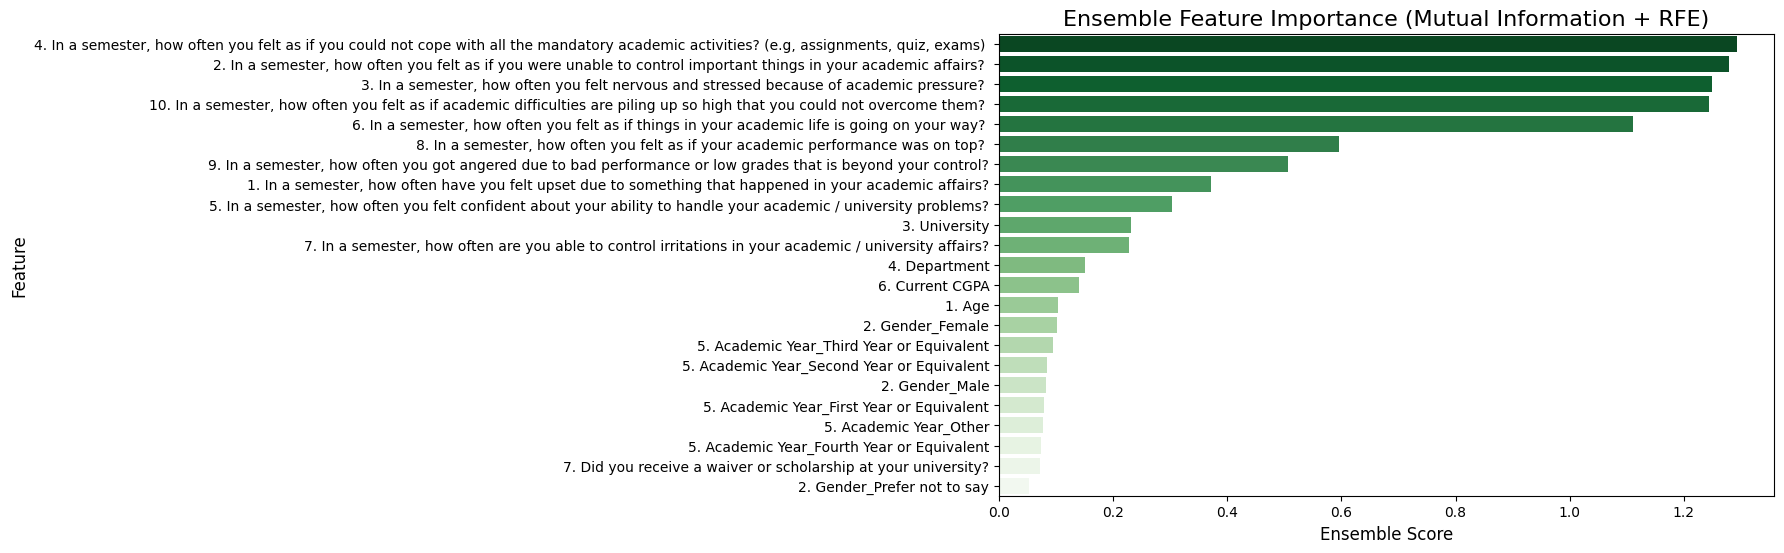

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import RFE, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are already defined and dataset is pre-split into train/test/validation sets

# 1. **Filter-Based Mutual Information**
mi_scores = mutual_info_classif(X_train, y_train, random_state=42)
mi_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

# 2. **Wrapper-Based RFE**
rf_classifier = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf_classifier, n_features_to_select=5)  # Adjust number of features to select
rfe.fit(X_train, y_train)

# Create DataFrame for RFE scores
rfe_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'RFE Ranking': rfe.ranking_
}).sort_values(by='RFE Ranking')

# Normalize the RFE scores for comparability (lower is better, so invert the scale)
rfe_scores_df['Normalized RFE Score'] = 1 / rfe_scores_df['RFE Ranking']

# 3. **Combine Both Scores**
combined_scores_df = mi_scores_df.merge(rfe_scores_df, on='Feature')
combined_scores_df['Ensemble Score'] = (
    combined_scores_df['Mutual Information'] + combined_scores_df['Normalized RFE Score']
)

# Sort by Ensemble Score
combined_scores_df = combined_scores_df.sort_values(by='Ensemble Score', ascending=False)

# 4. **Visualization**

# Plot Mutual Information
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_scores_df, palette='Oranges_r')
plt.title('Feature Importance Based on Mutual Information', fontsize=16)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Plot RFE Normalized Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Normalized RFE Score', y='Feature', data=rfe_scores_df, palette='Blues_r')
plt.title('Feature Importance Based on RFE (Normalized)', fontsize=16)
plt.xlabel('Normalized RFE Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Plot Combined Ensemble Scores
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Ensemble Score',
    y='Feature',
    data=combined_scores_df,
    palette='Greens_r'
)
plt.title('Ensemble Feature Importance (Mutual Information + RFE)', fontsize=16)
plt.xlabel('Ensemble Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()
